In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#data importing
df = pd.read_excel(open('C:/users/arjhu_000/dropbox/OSU/Grad Materials/Spring 2017/CSE 5544/Midterm/SchichDataS1_FB.xlsx','rb'), sheetname='FB')

#filtering dyear to 1500 and above
df = df.loc[df['DYear'] >= 1500]

In [5]:
#calculating number of individuals per year
totalcountgroup = df.groupby('DYear')
totalcountagg = totalcountgroup.count()
totalcount = totalcountagg.iloc[:,0]

#calculating number of males per year
male = df.loc[df['Gender'] == 'Male']
malegroup = male.groupby('DYear')
maleagg = malegroup.count()
malecount = maleagg.iloc[:,0]

#Calculating number of females in each profession per year
female = df.loc[df['Gender'] == 'Female']
femalegroup = female.groupby('DYear')
femaleagg = femalegroup.sum()

femaleagg = femaleagg[['PerformingArts','Creative','Gov/Law/Mil/Act/Rel','Academic/Edu/Health','Sports','Business/Industry/Travel']]

In [7]:
#concatenating all these into one data frame

totalMaleFemale = pd.concat([totalcount, malecount,femaleagg],axis=1,join_axes=[totalcount.index])
totalMaleFemale = totalMaleFemale.fillna(0)
totalMaleFemale.columns = ['total', 'male','performingarts','creative','govt','academic','sports','business']

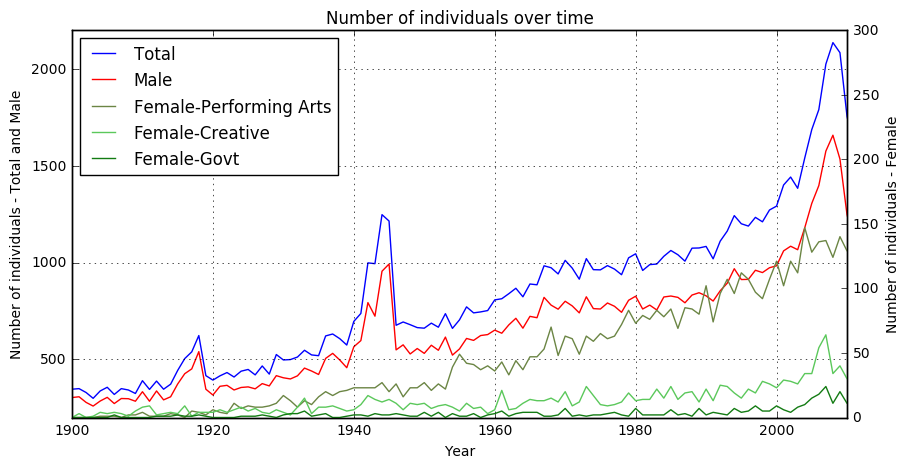

In [26]:
#plotting the line graph

year = totalMaleFemale.index
total = totalMaleFemale['total']
male = totalMaleFemale['male']
pa = totalMaleFemale['performingarts']
cr = totalMaleFemale['creative']
go = totalMaleFemale['govt']


fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)

lns1 = ax.plot(year, total, '-b', label = 'Total')
lns2 = ax.plot(year, male,'-r', label = 'Male')
ax2 = ax.twinx()
lns3 = ax2.plot(year, pa, color='#6B8544', label = 'Female-Performing Arts')
lns4 = ax2.plot(year, cr, color='#5BC85B', label = 'Female-Creative')
lns5 = ax2.plot(year, go, color='#137B13', label = 'Female-Govt')

# added these three lines
lns = lns1+lns2+lns3+lns4+lns5
labs = [l.get_label() for l in lns]
ax.legend(lns, labs, loc=0)

ax.grid()
ax.set_xlabel("Year")
ax.set_ylabel("Number of individuals - Total and Male")
ax2.set_ylabel("Number of individuals - Female")
ax.set_ylim(200, 2200)
ax2.set_ylim(0, 300)
ax.set_xlim(1900, 2010)
ax.set_title('Number of individuals over time')
plt.show()